Este conjunto de datos contiene diez variables base como edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones del suero sanguíneo para 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad en un año.

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes( return_X_y=False, as_frame=True)
diabetes.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


Obteber el árbol de decisión óptimo para predecir la respuesta de interes a partir de los datos de los pacientes.

## Crear conjuntos de entrenamiento y de prueba 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3)

## Entrenar modelo

In [43]:
reg = DecisionTreeRegressor(max_depth=2)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

## Calcular el error

In [44]:
error = metrics.mean_squared_error(y_test, y_pred)
print(error)

3448.628940862834


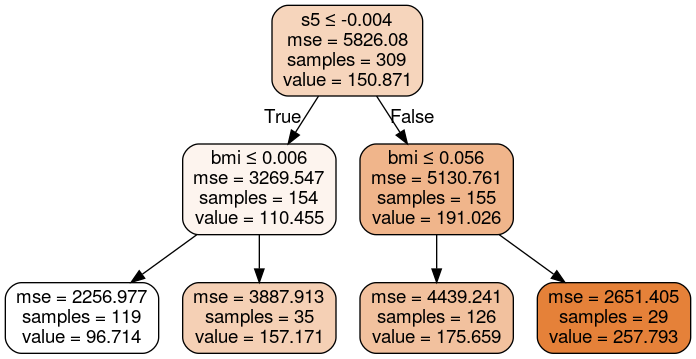

In [45]:
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = diabetes.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())